In [1]:
import cv2
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from utils import *
import os
#from scipy.sparse import csr_matrix
from scipy.sparse.linalg import lsqr
from scipy.sparse import csr_matrix

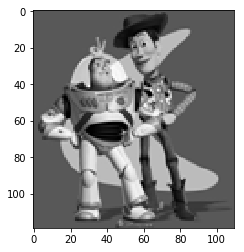

In [18]:
toy_img = cv2.cvtColor(cv2.imread('samples/toy_problem.png'), cv2.COLOR_BGR2RGB)
toy_img = cv2.cvtColor(toy_img, cv2.COLOR_BGR2GRAY).astype('double') / 255.0
plt.imshow(toy_img, cmap="gray")

In [19]:
toy_img.shape

(119, 110)

## Part 1 Toy Problem (20 pts)

In [1]:
def toy_reconstruct(toy_img):
    """
    The implementation for gradient domain processing is not complicated, but it is easy to make a mistake, so let's start with a toy example. Reconstruct this image from its gradient values, plus one pixel intensity. Denote the intensity of the source image at (x, y) as s(x,y) and the value to solve for as v(x,y). For each pixel, then, we have two objectives:
    1. minimize (v(x+1,y)-v(x,y) - (s(x+1,y)-s(x,y)))^2
    2. minimize (v(x,y+1)-v(x,y) - (s(x,y+1)-s(x,y)))^2
    Note that these could be solved while adding any constant value to v, so we will add one more objective:
    3. minimize (v(1,1)-s(1,1))^2
    
    :param toy_img: numpy.ndarray
    """
    rows, cols = toy_img.shape
    
    im2var = np.arange(rows * cols).reshape(rows, cols)
    print(im2var)
    
    size_toy = toy_img.size
    
    
    equations_num = 2 * size_toy + 1
    print(equations_num, size_toy)
    A = np.zeros(shape = (equations_num, size_toy))
    b = np.zeros(shape = (equations_num, 1))
    e = 0
    

    
    for y in range(0,rows):
        for x in range(0, cols - 1):
            A[e][im2var[y][x+1]] = 1
            A[e][im2var[y][x]] = -1
            b[e] = toy_img[y][x+1] - toy_img[y][x]
            e = e + 1
    


            
    for y in range(0,rows -1):
        for x in range(0, cols):
            A[e][im2var[y+1][x]] = 1
            A[e][im2var[y][x]] = -1
            b[e] = toy_img[y+1][x] - toy_img[y][x]
            e = e + 1
            


    
    A[e][im2var[0][0]] = 1
    b[e] = toy_img[0][0]
    print("start")  
    print(A.shape)
    print(b.shape)
    v = lsqr(A, b)
    print("done")
    
    im_out = np.reshape(v[0], (rows, cols))
    
    return im_out
            
            
    
    
    
    
    
    
    


In [23]:
im_out = toy_reconstruct(toy_img)


[[    0     1     2 ...,   107   108   109]
 [  110   111   112 ...,   217   218   219]
 [  220   221   222 ...,   327   328   329]
 ..., 
 [12760 12761 12762 ..., 12867 12868 12869]
 [12870 12871 12872 ..., 12977 12978 12979]
 [12980 12981 12982 ..., 13087 13088 13089]]
26181 13090
start
(26181, 13090)
(26181, 1)
done


In [63]:
im_out

array([[0.34509988, 0.34510081, 0.34510143, ..., 0.34510012, 0.34510014,
        0.34510012],
       [0.34510083, 0.34510115, 0.34510159, ..., 0.34510016, 0.34510017,
        0.34510013],
       [0.34510142, 0.34510152, 0.34510176, ..., 0.34510029, 0.34510029,
        0.34510024],
       ...,
       [0.34509328, 0.34509327, 0.34509327, ..., 0.34509293, 0.34509279,
        0.34509275],
       [0.34509314, 0.34509316, 0.3450932 , ..., 0.34509307, 0.34509293,
        0.34509286],
       [0.34509307, 0.34509308, 0.34509315, ..., 0.34509311, 0.34509299,
        0.34509295]])

In [64]:
if im_out.any():
    print("Error is: ", np.sqrt(((im_out - toy_img)**2).sum()))



Error is:  0.0003170185007507367


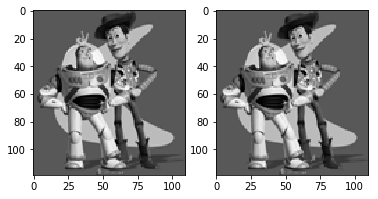

In [65]:
#Images sanity check
fig, axes = plt.subplots(1, 2)
axes[0].imshow(toy_img,cmap='gray')
axes[1].imshow(im_out,cmap='gray')



## Preparation

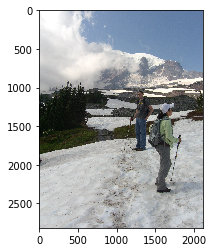

In [89]:
# Feel free to change image
background_img = cv2.cvtColor(cv2.imread('samples/im2.JPG'), cv2.COLOR_BGR2RGB).astype('double') / 255.0 
plt.figure()
plt.imshow(background_img)

If it doesn't get you to the drawing mode, then rerun this function again.


<IPython.core.display.Javascript object>


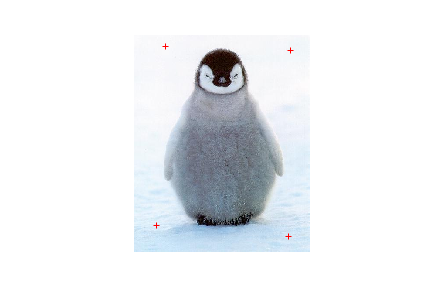

In [90]:
# Feel free to change image
object_img = cv2.cvtColor(cv2.imread('samples/penguin-chick.jpeg'), cv2.COLOR_BGR2RGB).astype('double') / 255.0 
import matplotlib.pyplot as plt
%matplotlib notebook
mask_coords = specify_mask(object_img)

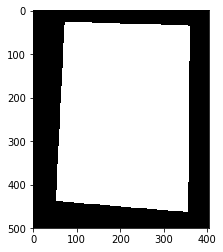

In [91]:
xs = mask_coords[0]
ys = mask_coords[1]
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure()
mask = get_mask(ys, xs, object_img)

If it doesn't get you to the drawing mode, then rerun this function again. Also, make sure the object fill fit into the background image. Otherwise it will crash


<IPython.core.display.Javascript object>


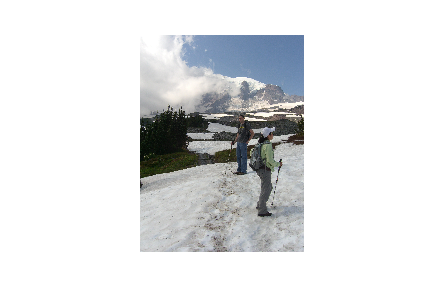

In [92]:
%matplotlib notebook
import matplotlib.pyplot as plt
bottom_center = specify_bottom_center(background_img)

In [93]:
bottom_center

array([ 639, 2277])

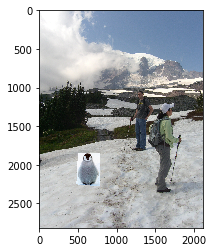

In [94]:
%matplotlib inline
import matplotlib.pyplot as plt
cropped_object, object_mask = align_source(object_img, mask, background_img, bottom_center)

## Part 2 Poisson Blending (50 pts)

In [99]:
def poisson_blend(cropped_object, object_mask, background_img, mask):
    """
    :param cropped_object: numpy.ndarray One you get from align_source
    :param object_mask: numpy.ndarray One you get from align_source
    :param background_img: numpy.ndarray 
    """
    #TO DO 
    row_start = int(bottom_center[1] - (mask.shape[0])) 
    col_start = int(bottom_center[0] - (mask.shape[1]/2))
    pad = 40

    output = background_img
    
    
    background_img = background_img[row_start - pad:row_start + mask.shape[0] + pad, col_start - pad: col_start + mask.shape [1] + pad]
    cropped_object = cropped_object[row_start - pad:row_start + mask.shape[0] + pad, col_start - pad: col_start + mask.shape [1] + pad]
    object_mask = object_mask[row_start - pad:row_start + mask.shape[0] + pad, col_start - pad: col_start + mask.shape [1] + pad]
    #return cropped_object
    
    
    
    

    #return cropped_object, background_img
    background_rows = background_img.shape[0]
    background_cols = background_img.shape[1]
    background_count = background_rows * background_cols
    
    output_mask = np.zeros(shape = (background_rows, background_cols,3))
    
    #print(background_count)
    im2var =  np.arange(background_count).reshape(background_rows, background_cols)
    
    #print(im2var)
    
   
    for z in range(3):
        v = []
        sparse_value = []
        sparse_row = []
        sparse_col = []
        b = []
        e = 0
        #A =  np.zeros(shape=(background_count,background_count))
        
        for y in range(background_rows):
            for x in range(background_cols):
                if not object_mask[y,x]: #background only
                    sparse_value.append(1)
                    sparse_row.append(e)
                    sparse_col.append(im2var[y,x])
                    b.append(background_img[y,x,z])
                    e = e + 1
                    
                    
                else:
                    if object_mask[y,x+1]:
                        sparse_value.append(-1)
                        sparse_row.append(e)
                        sparse_col.append(im2var[y,x + 1])
                        
                        sparse_value.append(1)
                        sparse_row.append(e)
                        sparse_col.append(im2var[y,x])
                        
                        b.append(cropped_object[y,x,z]  - cropped_object[y,x+1,z])
                        
                        e = e + 1
                    if object_mask[y+1,x]:
                        sparse_value.append(-1)
                        sparse_row.append(e)
                        sparse_col.append(im2var[y+1,x])
                        
                        sparse_value.append(1)
                        sparse_row.append(e)
                        sparse_col.append(im2var[y,x])
                        
                        b.append(cropped_object[y,x,z]  - cropped_object[y+1,x,z])
                        
                        e = e + 1
                        
                    if not object_mask[y,x+1]:
                        sparse_value.append(1)
                        sparse_row.append(e)
                        sparse_col.append(im2var[y,x])
                        
                        b.append(cropped_object[y,x,z] - cropped_object[y,x+1,z] + background_img[y,x+1,z])
                        
                        e = e + 1
                    
                    if not object_mask[y,x-1]:
                        sparse_value.append(1)
                        sparse_row.append(e)
                        sparse_col.append(im2var[y,x])
                        
                        b.append(cropped_object[y,x,z] - cropped_object[y,x-1,z] + background_img[y,x-1,z])
                        
                        e = e + 1
                    
                    if not object_mask[y+1,x]:
                        sparse_value.append(1)
                        sparse_row.append(e)
                        sparse_col.append(im2var[y,x])
                        
                        b.append(cropped_object[y,x,z] - cropped_object[y+1,x,z] + background_img[y+1,x,z])
                        
                        e = e + 1
                    
                    if not object_mask[y-1,x]:
                        sparse_value.append(1)
                        sparse_row.append(e)
                        sparse_col.append(im2var[y,x])
                        
                        b.append(cropped_object[y,x,z] - cropped_object[y-1,x,z] + background_img[y-1,x,z])
                        
                        e = e + 1
                    
        sparse_value = np.asarray(sparse_value)
        sparse_row = np.asarray(sparse_row)
        sparse_col = np.asarray(sparse_col)
        b = np.asarray(b).T
        #return 0
        A = csr_matrix((sparse_value, (sparse_row, sparse_col)), shape=(e, background_count))
        print(z)
        v = lsqr(A, b)
        
        send = np.clip(v[0], a_min = 0, a_max = 1)             
        output[row_start - pad:row_start + mask.shape[0] + pad, col_start - pad: col_start + mask.shape [1] + pad,z] = np.reshape(send, (background_rows, background_cols))                
        output_mask[:,:,z] = np.reshape(send, (background_rows, background_cols))
         
        
    return output, output_mask
                        
                        
                        
                        
                    
                    
                        
                        
                    
                            
    
                    

0
1
2


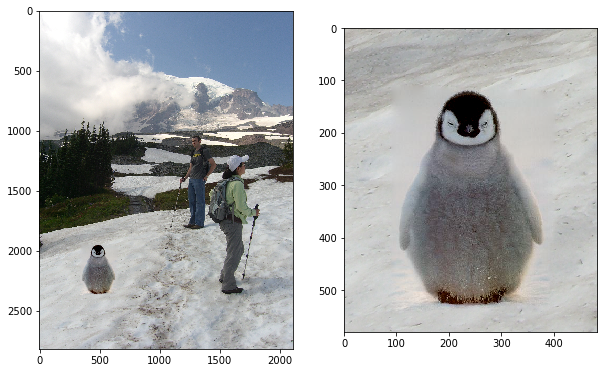

In [130]:
output, output_mask = poisson_blend(cropped_object, object_mask, background_img,mask)
fig, axes = plt.subplots(1, 2)
fig.set_size_inches(10, 10)
axes[0].imshow(output)
axes[1].imshow(output_mask)



## Part 3 Mixed Gradients (20 pts)

In [101]:
def mix_blend(cropped_object, object_mask, background_img, mask):
    """
    :param cropped_object: numpy.ndarray One you get from align_source
    :param object_mask: numpy.ndarray One you get from align_source
    :param background_img: numpy.ndarray 
    """
    #TO DO 
    row_start = int(bottom_center[1] - (mask.shape[0])) 
    col_start = int(bottom_center[0] - (mask.shape[1]/2))
    pad = 40

    output = background_img
    
    
    background_img = background_img[row_start - pad:row_start + mask.shape[0] + pad, col_start - pad: col_start + mask.shape [1] + pad]
    cropped_object = cropped_object[row_start - pad:row_start + mask.shape[0] + pad, col_start - pad: col_start + mask.shape [1] + pad]
    object_mask = object_mask[row_start - pad:row_start + mask.shape[0] + pad, col_start - pad: col_start + mask.shape [1] + pad]
    #return cropped_object
    
    
    
    

    #return cropped_object, background_img
    background_rows = background_img.shape[0]
    background_cols = background_img.shape[1]
    background_count = background_rows * background_cols
    
    output_mask = np.zeros(shape = (background_rows, background_cols,3))
    
    #print(background_count)
    im2var =  np.arange(background_count).reshape(background_rows, background_cols)
    
    #print(im2var)
    
   
    for z in range(3):
        v = []
        sparse_value = []
        sparse_row = []
        sparse_col = []
        b = []
        e = 0
        #A =  np.zeros(shape=(background_count,background_count))
        
        for y in range(background_rows):
            for x in range(background_cols):
                if not object_mask[y,x]: #background only
                    sparse_value.append(1)
                    sparse_row.append(e)
                    sparse_col.append(im2var[y,x])
                    b.append(background_img[y,x,z])
                    e = e + 1
                
                else:
                    if object_mask[y,x+1]:
                        sparse_value.append(-1)
                        sparse_row.append(e)
                        sparse_col.append(im2var[y,x + 1])
                        
                        sparse_value.append(1)
                        sparse_row.append(e)
                        sparse_col.append(im2var[y,x])
                        
                        background_gradiant = abs(background_img[y,x,z] - background_img[y,x+1,z])
                        source_gradiant = abs(cropped_object[y,x,z] - cropped_object[y,x+1,z])
                        
                        if background_gradiant > source_gradiant:
                            b.append(background_img[y,x,z]  - background_img[y,x+1,z])
                            e = e + 1
                        else:
                            b.append(cropped_object[y,x,z]  - cropped_object[y,x+1,z])
                            e = e + 1
                    
                    if object_mask[y+1,x]:
                        sparse_value.append(-1)
                        sparse_row.append(e)
                        sparse_col.append(im2var[y+1,x])
                        
                        sparse_value.append(1)
                        sparse_row.append(e)
                        sparse_col.append(im2var[y,x])
                        
                        
                        background_gradiant = abs(background_img[y,x,z] - background_img[y+1,x,z])
                        source_gradiant = abs(cropped_object[y,x,z] - cropped_object[y+1,x,z])
                        
                        if background_gradiant > source_gradiant:
                            b.append(background_img[y,x,z]  - background_img[y+1,x,z])
                            e = e + 1
                        else:
                            b.append(cropped_object[y,x,z]  - cropped_object[y+1,x,z])
                            e = e + 1
                    
                    if not object_mask[y,x+1]:
                        sparse_value.append(1)
                        sparse_row.append(e)
                        sparse_col.append(im2var[y,x])
                        
                        
                        background_gradiant = abs(background_img[y,x,z] - background_img[y,x+1,z])
                        source_gradiant = abs(cropped_object[y,x,z] - cropped_object[y,x+1,z])
                        
                        if background_gradiant > source_gradiant:
                            b.append(background_img[y,x,z]  - background_img[y,x+1,z] + background_img[y,x+1,z])
                            e = e + 1
                        else:
                            b.append(cropped_object[y,x,z]  - cropped_object[y,x+1,z] + background_img[y,x+1,z])
                            e = e + 1
                    
                    if not object_mask[y,x-1]:
                        sparse_value.append(1)
                        sparse_row.append(e)
                        sparse_col.append(im2var[y,x])
                        
                        
                        background_gradiant = abs(background_img[y,x,z] - background_img[y,x-1,z])
                        source_gradiant = abs(cropped_object[y,x,z] - cropped_object[y,x-1,z])
                        
                        if background_gradiant > source_gradiant:
                            b.append(background_img[y,x,z]  - background_img[y,x-1,z] + background_img[y,x-1,z])
                            e = e + 1
                        else:
                            b.append(cropped_object[y,x,z]  - cropped_object[y,x-1,z] + background_img[y,x-1,z])
                            e = e + 1
                    
                    if not object_mask[y+1,x]:
                        sparse_value.append(1)
                        sparse_row.append(e)
                        sparse_col.append(im2var[y,x])
                        
                        
                        background_gradiant = abs(background_img[y,x,z] - background_img[y+1,x,z])
                        source_gradiant = abs(cropped_object[y,x,z] - cropped_object[y+1,x,z])
                        
                        if background_gradiant > source_gradiant:
                            b.append(background_img[y,x,z]  - background_img[y+1,x,z] + background_img[y+1,x,z])
                            e = e + 1
                        else:
                            b.append(cropped_object[y,x,z]  - cropped_object[y+1,x,z] + background_img[y+1,x,z])
                            e = e + 1
                            
                    if not object_mask[y-1,x]:
                        sparse_value.append(1)
                        sparse_row.append(e)
                        sparse_col.append(im2var[y,x])
                        
                        
                        background_gradiant = abs(background_img[y,x,z] - background_img[y-1,x,z])
                        source_gradiant = abs(cropped_object[y,x,z] - cropped_object[y-1,x,z])
                        
                        if background_gradiant > source_gradiant:
                            b.append(background_img[y,x,z]  - background_img[y-1,x,z] + background_img[y-1,x,z])
                            e = e + 1
                        else:
                            b.append(cropped_object[y,x,z]  - cropped_object[y-1,x,z] + background_img[y-1,x,z])
                            e = e + 1
                            
        sparse_value = np.asarray(sparse_value)
        sparse_row = np.asarray(sparse_row)
        sparse_col = np.asarray(sparse_col)
        b = np.asarray(b).T
        #return 0
        A = csr_matrix((sparse_value, (sparse_row, sparse_col)), shape=(e, background_count))
        print(z)
        v = lsqr(A, b)
        
        send = np.clip(v[0], a_min = 0, a_max = 1)             
        output[row_start - pad:row_start + mask.shape[0] + pad, col_start - pad: col_start + mask.shape [1] + pad,z] = np.reshape(send, (background_rows, background_cols))                
        output_mask[:,:,z] = np.reshape(send, (background_rows, background_cols))
         
        
    return output, output_mask
                            
                    
                    
                            
                        
                        
                        
                        
                            
                            
    
    
    
    #TO DO 
    pass

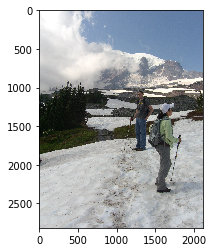

In [120]:
# Feel free to change image
background_img = cv2.cvtColor(cv2.imread('samples/im2.JPG'), cv2.COLOR_BGR2RGB).astype('double') / 255.0 
plt.figure()
plt.imshow(background_img)

If it doesn't get you to the drawing mode, then rerun this function again.


<IPython.core.display.Javascript object>


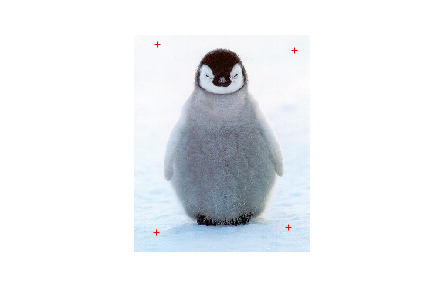

In [121]:
# Feel free to change image
object_img = cv2.cvtColor(cv2.imread('samples/penguin-chick.jpeg'), cv2.COLOR_BGR2RGB).astype('double') / 255.0 
import matplotlib.pyplot as plt
%matplotlib notebook
mask_coords = specify_mask(object_img)

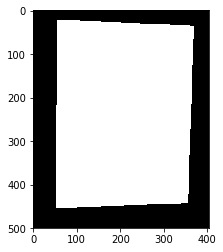

In [122]:
xs = mask_coords[0]
ys = mask_coords[1]
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure()
mask = get_mask(ys, xs, object_img)

If it doesn't get you to the drawing mode, then rerun this function again. Also, make sure the object fill fit into the background image. Otherwise it will crash


<IPython.core.display.Javascript object>


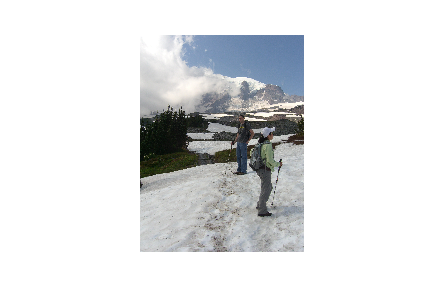

In [127]:
%matplotlib notebook
import matplotlib.pyplot as plt
bottom_center = specify_bottom_center(background_img)

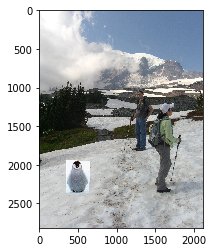

In [128]:
%matplotlib inline
import matplotlib.pyplot as plt
cropped_object, object_mask = align_source(object_img, mask, background_img, bottom_center)

0
1
2


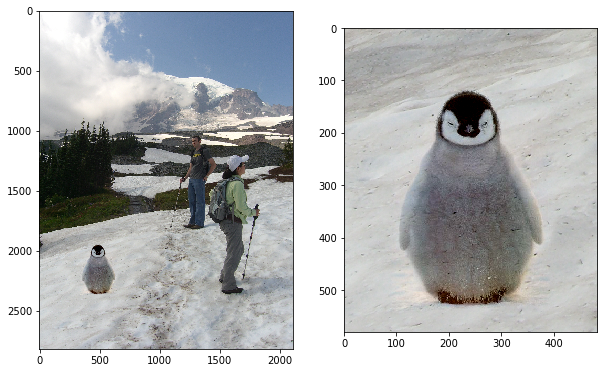

In [129]:
output, output_mask = mix_blend(cropped_object, object_mask, background_img, mask)
fig, axes = plt.subplots(1, 2)
fig.set_size_inches(10, 10)
axes[0].imshow(output)
axes[1].imshow(output_mask)

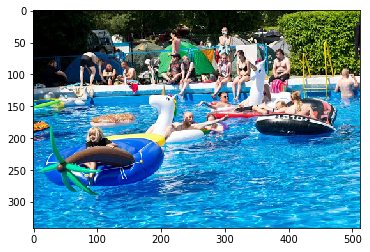

In [131]:
# Feel free to change image
background_img = cv2.cvtColor(cv2.imread('samples/pool.JPG'), cv2.COLOR_BGR2RGB).astype('double') / 255.0 
plt.figure()
plt.imshow(background_img)

If it doesn't get you to the drawing mode, then rerun this function again.


<IPython.core.display.Javascript object>


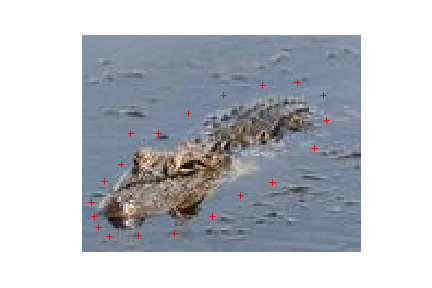

In [145]:
# Feel free to change image
object_img = cv2.cvtColor(cv2.imread('samples/alligator_small.jpg'), cv2.COLOR_BGR2RGB).astype('double') / 255.0 
import matplotlib.pyplot as plt
%matplotlib notebook
mask_coords = specify_mask(object_img)

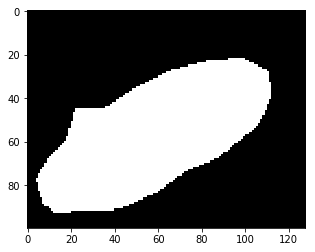

In [146]:
xs = mask_coords[0]
ys = mask_coords[1]
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure()
mask = get_mask(ys, xs, object_img)

If it doesn't get you to the drawing mode, then rerun this function again. Also, make sure the object fill fit into the background image. Otherwise it will crash


<IPython.core.display.Javascript object>


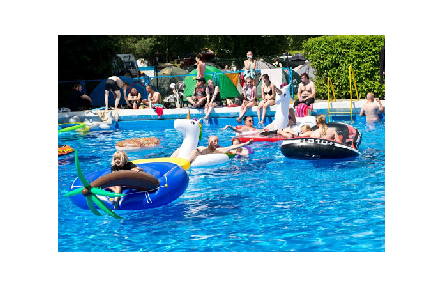

In [147]:
%matplotlib notebook
import matplotlib.pyplot as plt
bottom_center = specify_bottom_center(background_img)

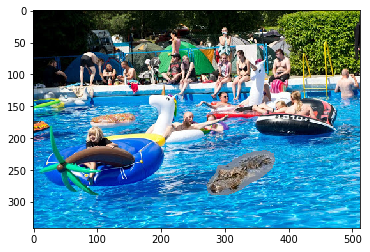

In [148]:
%matplotlib inline
import matplotlib.pyplot as plt
cropped_object, object_mask = align_source(object_img, mask, background_img, bottom_center)

0
1
2


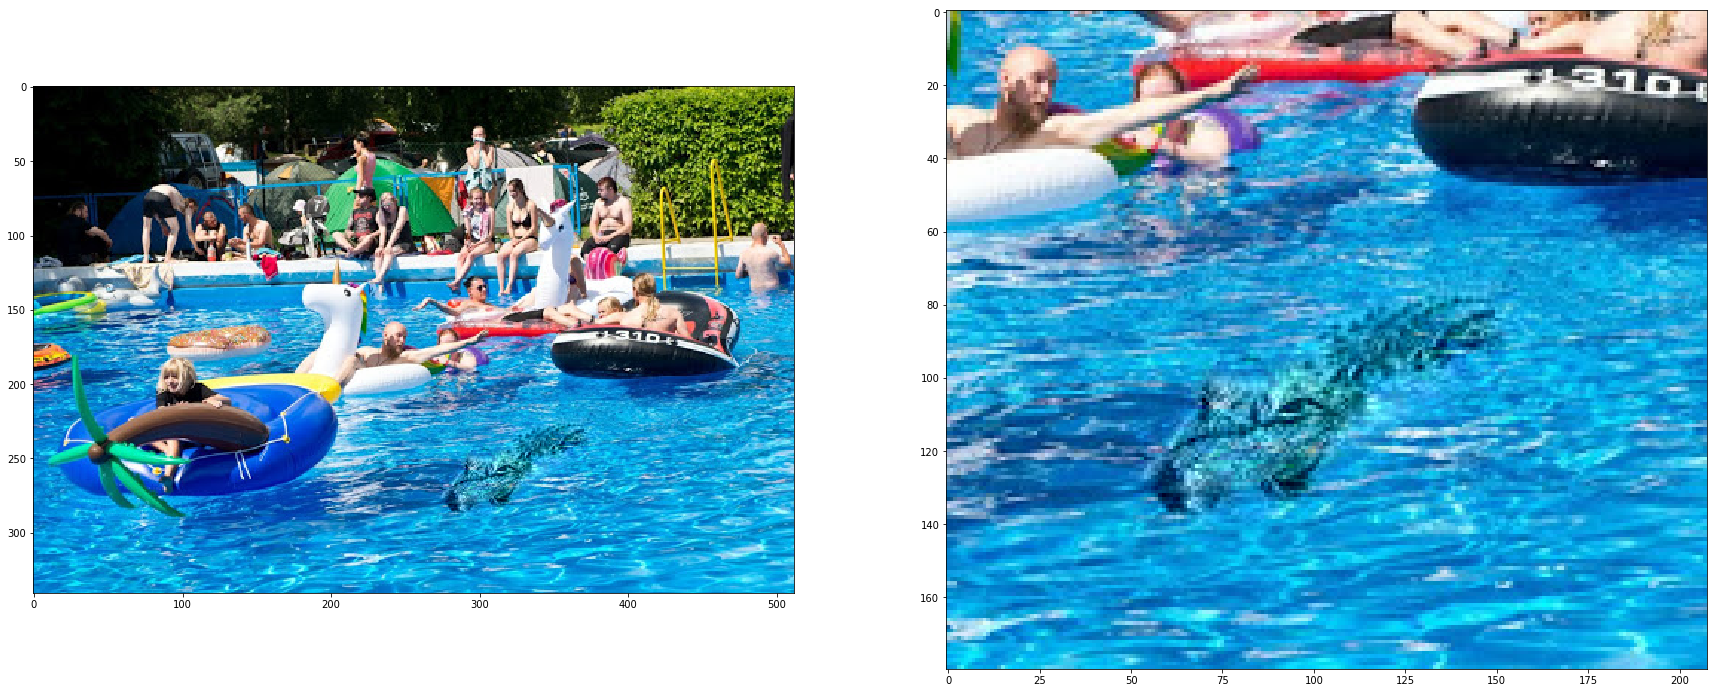

In [151]:
output, output_mask = mix_blend(cropped_object, object_mask, background_img, mask)
fig, axes = plt.subplots(1, 2)
fig.set_size_inches(30, 30)
axes[0].imshow(output)
axes[1].imshow(output_mask)

# Bells & Whistles (Extra Points)

## Color2Gray (20 pts)

In [17]:
def color2gray(img):
    pass

## Laplacian pyramid blending (20 pts)

In [18]:
def laplacian_blend(img1, img2):
    pass

## More gradient domain processing (up to 20 pts)